In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [2]:
data = pd.read_csv('digikala-orders.csv')
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [3]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])
data['MonthYear'] = data['DateTime_CartFinalize'].map(lambda date:100*date.year + date.month)
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,MonthYear
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,201702


In [4]:
itemes = data.groupby(['MonthYear'])['Quantity_item'].sum().reset_index()
itemes

,MonthYear,Quantity_item
0,201309,7.0
1,201310,77.0
2,201311,104.0
3,201312,125.0
4,201401,156.0
...,...,...
59,201808,7944.0
60,201809,8911.0
61,201810,7311.0
62,201811,7572.0


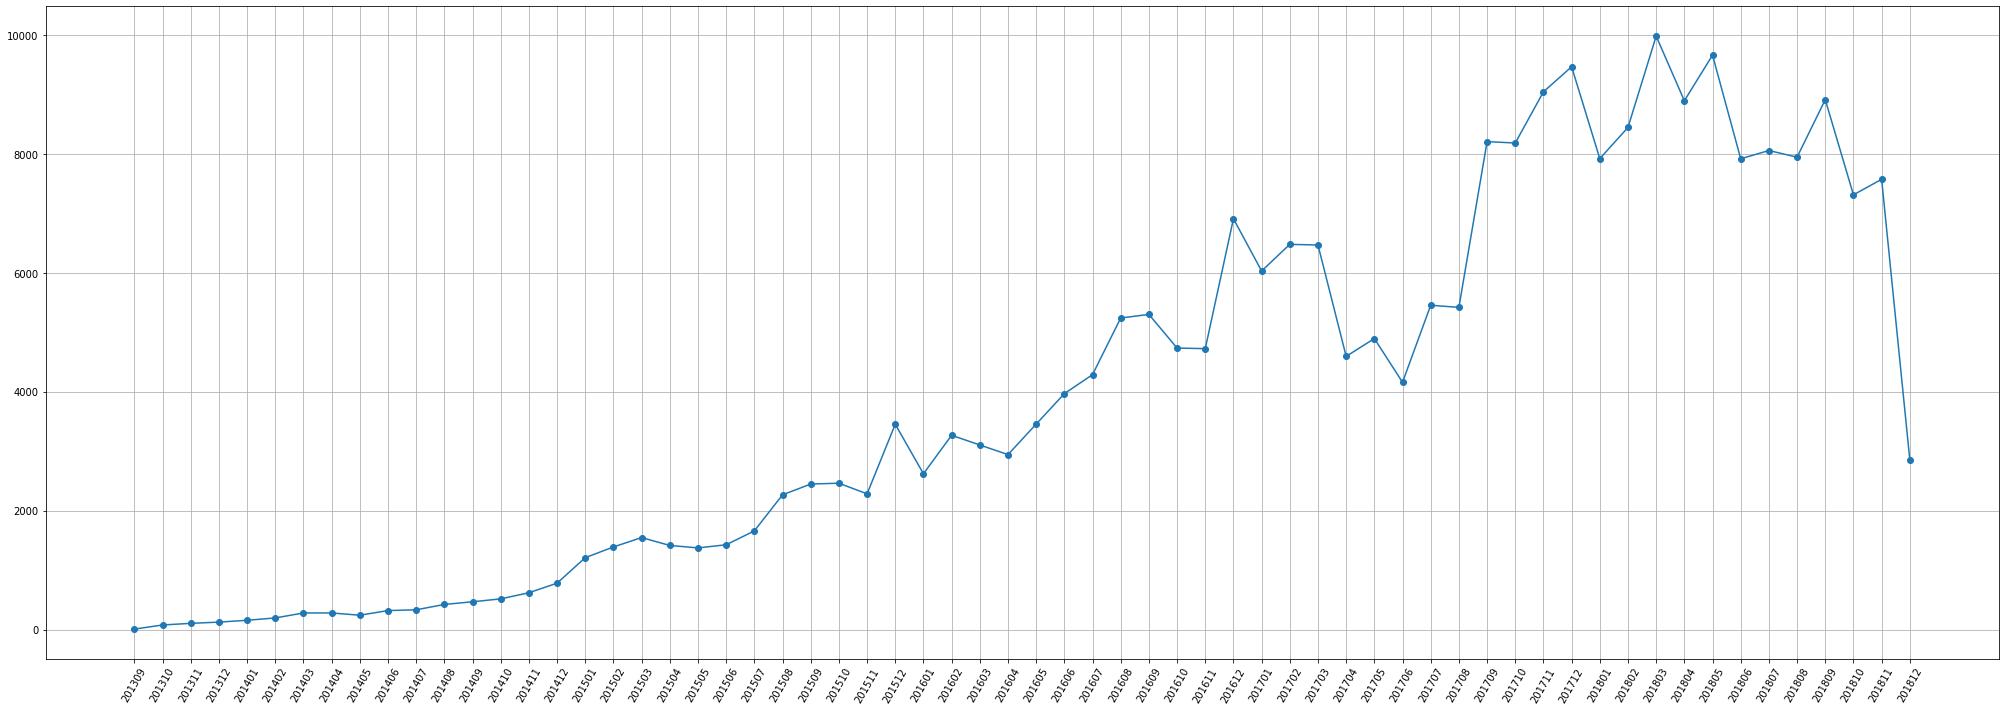

In [5]:
plt.figure(figsize=(35,12))
plt.plot(itemes['MonthYear'].to_numpy(dtype=str),itemes['Quantity_item'],marker='o')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "22"
plt.xticks(rotation=60)
plt.grid(True)

In [6]:
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,MonthYear
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,201702


In [59]:
c = data.value_counts(['city_name_fa'])
c = c.sort_values(ascending=False)
max_city = c[0:8]
min_city = c[8:]
others = min_city.sum()
max_city.loc[others]= others
max_city

city_name_fa
تهران           108306
مشهد              6024
اصفهان            5992
کرج               5934
اهواز             4313
شیراز             4065
رشت               3204
تبریز             2630
59532            59532
dtype: int64

In [62]:
labels = ['تهران','مشهد','اصفهان','کرج','اهواز','شیراز','رشت','تبریز','others']
persian_labels = [get_display(reshape(label)) for label in labels]
persian_labels

['ﻥﺍﺮﻬﺗ', 'ﺪﻬﺸﻣ', 'ﻥﺎﻬﻔﺻﺍ', 'ﺝﺮﮐ', 'ﺯﺍﻮﻫﺍ', 'ﺯﺍﺮﯿﺷ', 'ﺖﺷﺭ', 'ﺰﯾﺮﺒﺗ', 'others']

([<matplotlib.patches.Wedge at 0x16f5238cc48>,
 [Text(-0.14311059743222707, 1.0906508868114448, 'ﻥﺍﺮﻬﺗ'),
  Text(-1.0311947390791933, -0.38293264433238716, 'ﺪﻬﺸﻣ'),
  Text(-0.9410318912590546, -0.5696130086588674, 'ﻥﺎﻬﻔﺻﺍ'),
  Text(-0.8184835905756545, -0.734904491725547, 'ﺝﺮﮐ'),
  Text(-0.6901240967875715, -0.8565796699858916, 'ﺯﺍﻮﻫﺍ'),
  Text(-0.5717547132655996, -0.9397321681514219, 'ﺯﺍﺮﯿﺷ'),
  Text(-0.4609649474496746, -0.9987548834537525, 'ﺖﺷﺭ'),
  Text(-0.3676326208653226, -1.0367479231113483, 'ﺰﯾﺮﺒﺗ'),
  Text(0.6530883862710488, -0.8851415478429863, 'others')],
 [Text(-0.07806032587212385, 0.5949004837153336, '54%'),
  Text(-0.5624698576795599, -0.20887235145402933, '3%'),
  Text(-0.5132901225049388, -0.31069800472301856, '3%'),
  Text(-0.44644559485944785, -0.4008569954866619, '3%'),
  Text(-0.37643132552049346, -0.467225274537759, '2%'),
  Text(-0.3118662072357815, -0.5125811826280482, '2%'),
  Text(-0.25143542588164064, -0.544775390974774, '2%'),
  Text(-0.20052688410835776, 

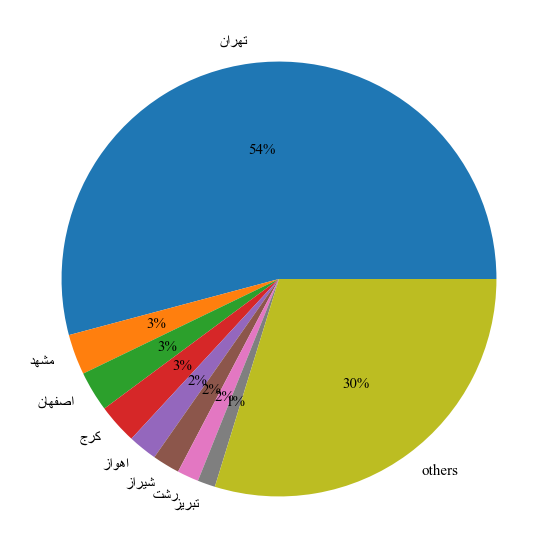

In [73]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 15.0
plt.pie(max_city, labels=persian_labels,autopct='%1.0f%%')